# Performance analysis

### Abstract 

We want to be able to match artist pseudonyms with their real name.

We have two files, one containing the pseudo and the other real name of the artists.

Let's first extract features and compute pairwise similarity metrics.

In [1]:
# dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Duckduckgo_Similarity.engine import DdgToken
%matplotlib inline

In [34]:
# (you don't need to run this cell, results are going to be exported as csv file for easy reusability.)
pseudo = pd.read_csv('data/pseudonym.csv', names=['pseudo'])
real_names = pd.read_csv('data/real_name.csv', names=['real_name'])

score = pd.concat([pseudo, real_names], axis=1)

score = pd.DataFrame(score, score.pseudo, score.real_name)

# compute score matrix
for pseudo in score.index:
    for name in score.columns:

        score.loc[pseudo, name] = DdgToken(pseudo).similarity(DdgToken(name), metric='mean') # try with metric='max'

# export score matrix
score.to_csv('data/score_matrix.csv')

# export features
all_features = pd.concat([pd.DataFrame(token.features, index=[token.string]) for token in DdgToken.get_instances()])
all_features.to_csv('data/features.csv')

In [35]:
# features
pd.read_csv('data/features.csv',index_col=0)

,abstract_text,abstract_url,best_result,image_url
Booba,"Elie Yaffa, better known under his stage name ...",Booba,NaN,0167cf4f.jpg
Andre Romelle Young,"Andre Romelle Young, better known by his stage...",Dr._Dre,NaN,3862a395.jpg
Bruno Beausir,"Doc Gynéco, whose real name is Bruno Beausir, ...",Doc_Gyn%C3%A9co,NaN,58d12d02.jpg
Bruno Lopes,"Kool Shen, whose real name is Bruno Lopes, bor...",Kool_Shen,NaN,NaN
Didier Morville,"Didier Morville, better known by his stage nam...",Joeystarr,NaN,9c228ee7.jpg
Dwayne Johnson,"Dwayne Douglas Johnson, also known by his ring...",Dwayne_Johnson,NaN,639d3832.jpg
Elie Yaffa,NaN,NaN,NaN,NaN
Gary Grice,NaN,NaN,NaN,NaN
Marshall Mathers,NaN,NaN,NaN,NaN
Mathias Crochon,"Rockin 'Squat or Mathias Kassel, whose real na...",Rockin'_Squat,NaN,NaN


I managed to reduce the number of missing feature by adding a language parameter during the extraction. If nothing was rendered with default parameter (assuming english name) I changed it to french and translate the text to english.

However there are still a lot of missing features left, which is polluting our similary metrics. This is linked to the existing api I used from https://github.com/crazedpsyc/python-duckduckgo. I did not manage to find a correction fix, meanwhile it seems reasonnable to exclude missing features when computing similary.


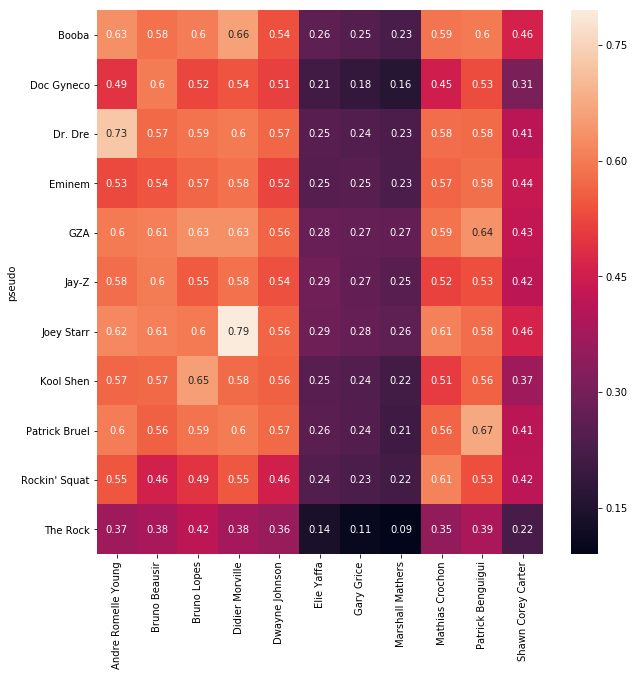

In [36]:
# score matrix
score_matrix = pd.read_csv('data/score_matrix.csv', index_col=0)
plt.figure(figsize=(10, 10))
sns.heatmap(score_matrix, annot=True)

In [37]:
score_matrix

,Andre Romelle Young,Bruno Beausir,Bruno Lopes,Didier Morville,Dwayne Johnson,Elie Yaffa,Gary Grice,Marshall Mathers,Mathias Crochon,Patrick Benguigui,Shawn Corey Carter
pseudo,,,,,,,,,,,
Booba,0.630570,0.583465,0.602499,0.662069,0.536003,0.262198,0.245626,0.227656,0.589749,0.597274,0.459440
Doc Gyneco,0.493021,0.600784,0.522259,0.542458,0.512847,0.213573,0.184900,0.162031,0.451909,0.533008,0.311693
Dr. Dre,0.726141,0.572138,0.585869,0.597965,0.567442,0.254125,0.240721,0.231569,0.578004,0.576655,0.413446
Eminem,0.526732,0.541862,0.566206,0.584844,0.521719,0.247839,0.249965,0.229795,0.565102,0.582577,0.435526
GZA,0.597157,0.606508,0.630604,0.630601,0.564380,0.279535,0.273710,0.270111,0.587356,0.636387,0.427109
Jay-Z,0.578998,0.599776,0.551168,0.584350,0.538202,0.294599,0.269299,0.250377,0.516706,0.533510,0.418128
Joey Starr,0.619909,0.606689,0.597068,0.794368,0.564335,0.287929,0.277029,0.262590,0.608371,0.579834,0.463451
Kool Shen,0.566866,0.573252,0.654473,0.576534,0.558652,0.251348,0.241399,0.216142,0.507211,0.561066,0.365990
Patrick Bruel,0.601904,0.558388,0.588067,0.599650,0.573335,0.257999,0.241855,0.208153,0.564326,0.673109,0.414225


### Accuracy
Now for each pseudo, compare the artist with the highest similarity score with the real name.

In [42]:
predictions = pd.read_csv('data/results.csv', sep=';')
predictions['Engine prediction'] = predictions.apply(lambda x: score_matrix.loc[x.pseudo,:].idxmax(), axis=1)
predictions

,pseudo,real_name,Engine prediction
0,Booba,Elie Yaffa,Didier Morville
1,Doc Gyneco,Bruno Beausir,Bruno Beausir
2,Dr. Dre,Andre Romelle Young,Andre Romelle Young
3,Eminem,Marshall Mathers,Didier Morville
4,GZA,Gary Grice,Patrick Benguigui
5,Jay-Z,Shawn Corey Carter,Bruno Beausir
6,Joey Starr,Didier Morville,Didier Morville
7,Kool Shen,Bruno Lopes,Bruno Lopes
8,Patrick Bruel,Patrick Benguigui,Patrick Benguigui
9,Rockin' Squat,Mathias Crochon,Mathias Crochon


In [43]:
accurary = len(predictions[predictions.real_name == predictions['Engine prediction']]) / len(predictions)
accurary


0.5454545454545454

Now let's do the inverse reasoning, for every real name, find the pseudo with the hight score and compute accurary.

In [46]:
predictions = pd.read_csv('data/results.csv', sep=';')
predictions['Engine prediction'] = predictions.apply(lambda x: score_matrix[x.real_name].idxmax(), axis=1)
predictions

,pseudo,real_name,Engine prediction
0,Booba,Elie Yaffa,Jay-Z
1,Doc Gyneco,Bruno Beausir,Joey Starr
2,Dr. Dre,Andre Romelle Young,Dr. Dre
3,Eminem,Marshall Mathers,GZA
4,GZA,Gary Grice,Joey Starr
5,Jay-Z,Shawn Corey Carter,Joey Starr
6,Joey Starr,Didier Morville,Joey Starr
7,Kool Shen,Bruno Lopes,Kool Shen
8,Patrick Bruel,Patrick Benguigui,Patrick Bruel
9,Rockin' Squat,Mathias Crochon,Rockin' Squat


In [45]:
accurary = len(predictions[predictions.pseudo == predictions['Engine prediction']]) / len(predictions)
accurary

0.45454545454545453

45%: it is even lower... 
Results are overall quite disappointing. 

## Some improvement ideas

    - Affect a coefficient to each feature through machine learning technique.
    - Use multitreading/processing for performance enhancing. 
    - Bug fix the API.
    - Jaccard similarity instead of cosine similarity measure. However it is not available in spacy. Can be implemented with sklearn 